# Bagging and Bootstrapping

Purpose: Develop models to predict drug consumption from dataset.

Author: Jordan A. Caraballo-Vega

Version: 2024.04.02

## 1. Import Necessary Libraries

In [75]:
import random
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Load the Dataset

In [3]:
drug_df = pd.read_csv('drive/MyDrive/Terminal34/drug_consumption.csv')
drug_df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


## 3. Perform EDA

In [4]:
drug_df['Age'].unique()

array([ 0.49788, -0.07854, -0.95197,  2.59171,  1.09449,  1.82213])

<Axes: xlabel='Age', ylabel='count'>

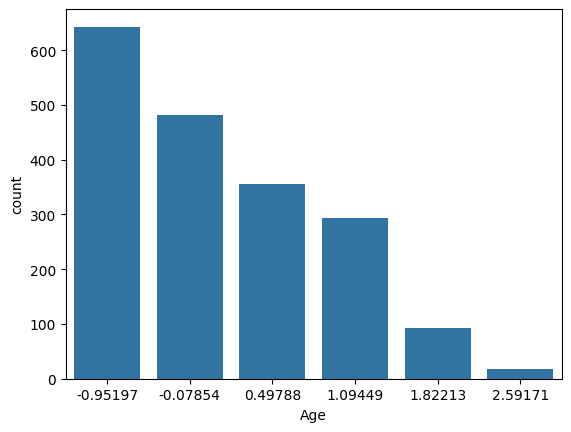

In [5]:
sns.countplot(data=drug_df, x='Age')

In [6]:
drug_df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


<Axes: xlabel='Gender', ylabel='count'>

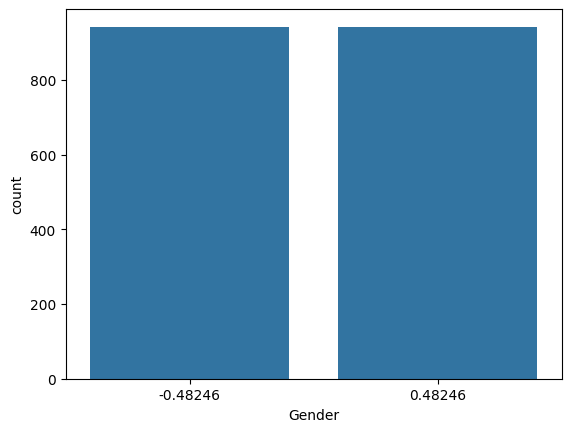

In [7]:
sns.countplot(data=drug_df, x='Gender')

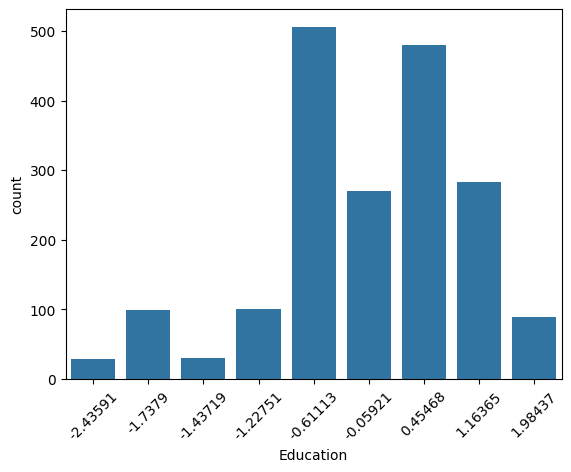

In [8]:
sns.countplot(data=drug_df, x='Education')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Ecstasy', ylabel='count'>

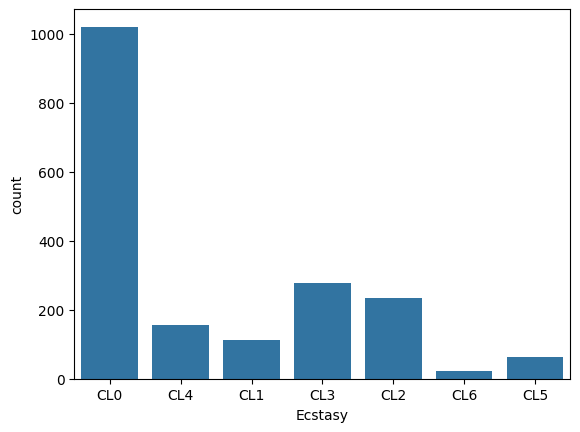

In [9]:
sns.countplot(data=drug_df, x='Ecstasy')

<Axes: xlabel='Nscore', ylabel='Count'>

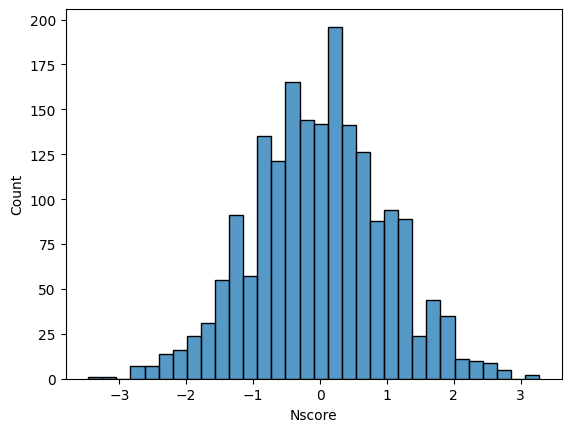

In [10]:
sns.histplot(data=drug_df, x='Nscore')

<Axes: xlabel='Escore', ylabel='Count'>

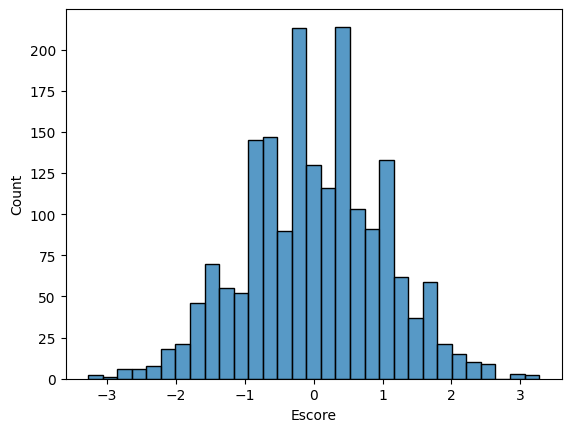

In [11]:
sns.histplot(data=drug_df, x='Escore')

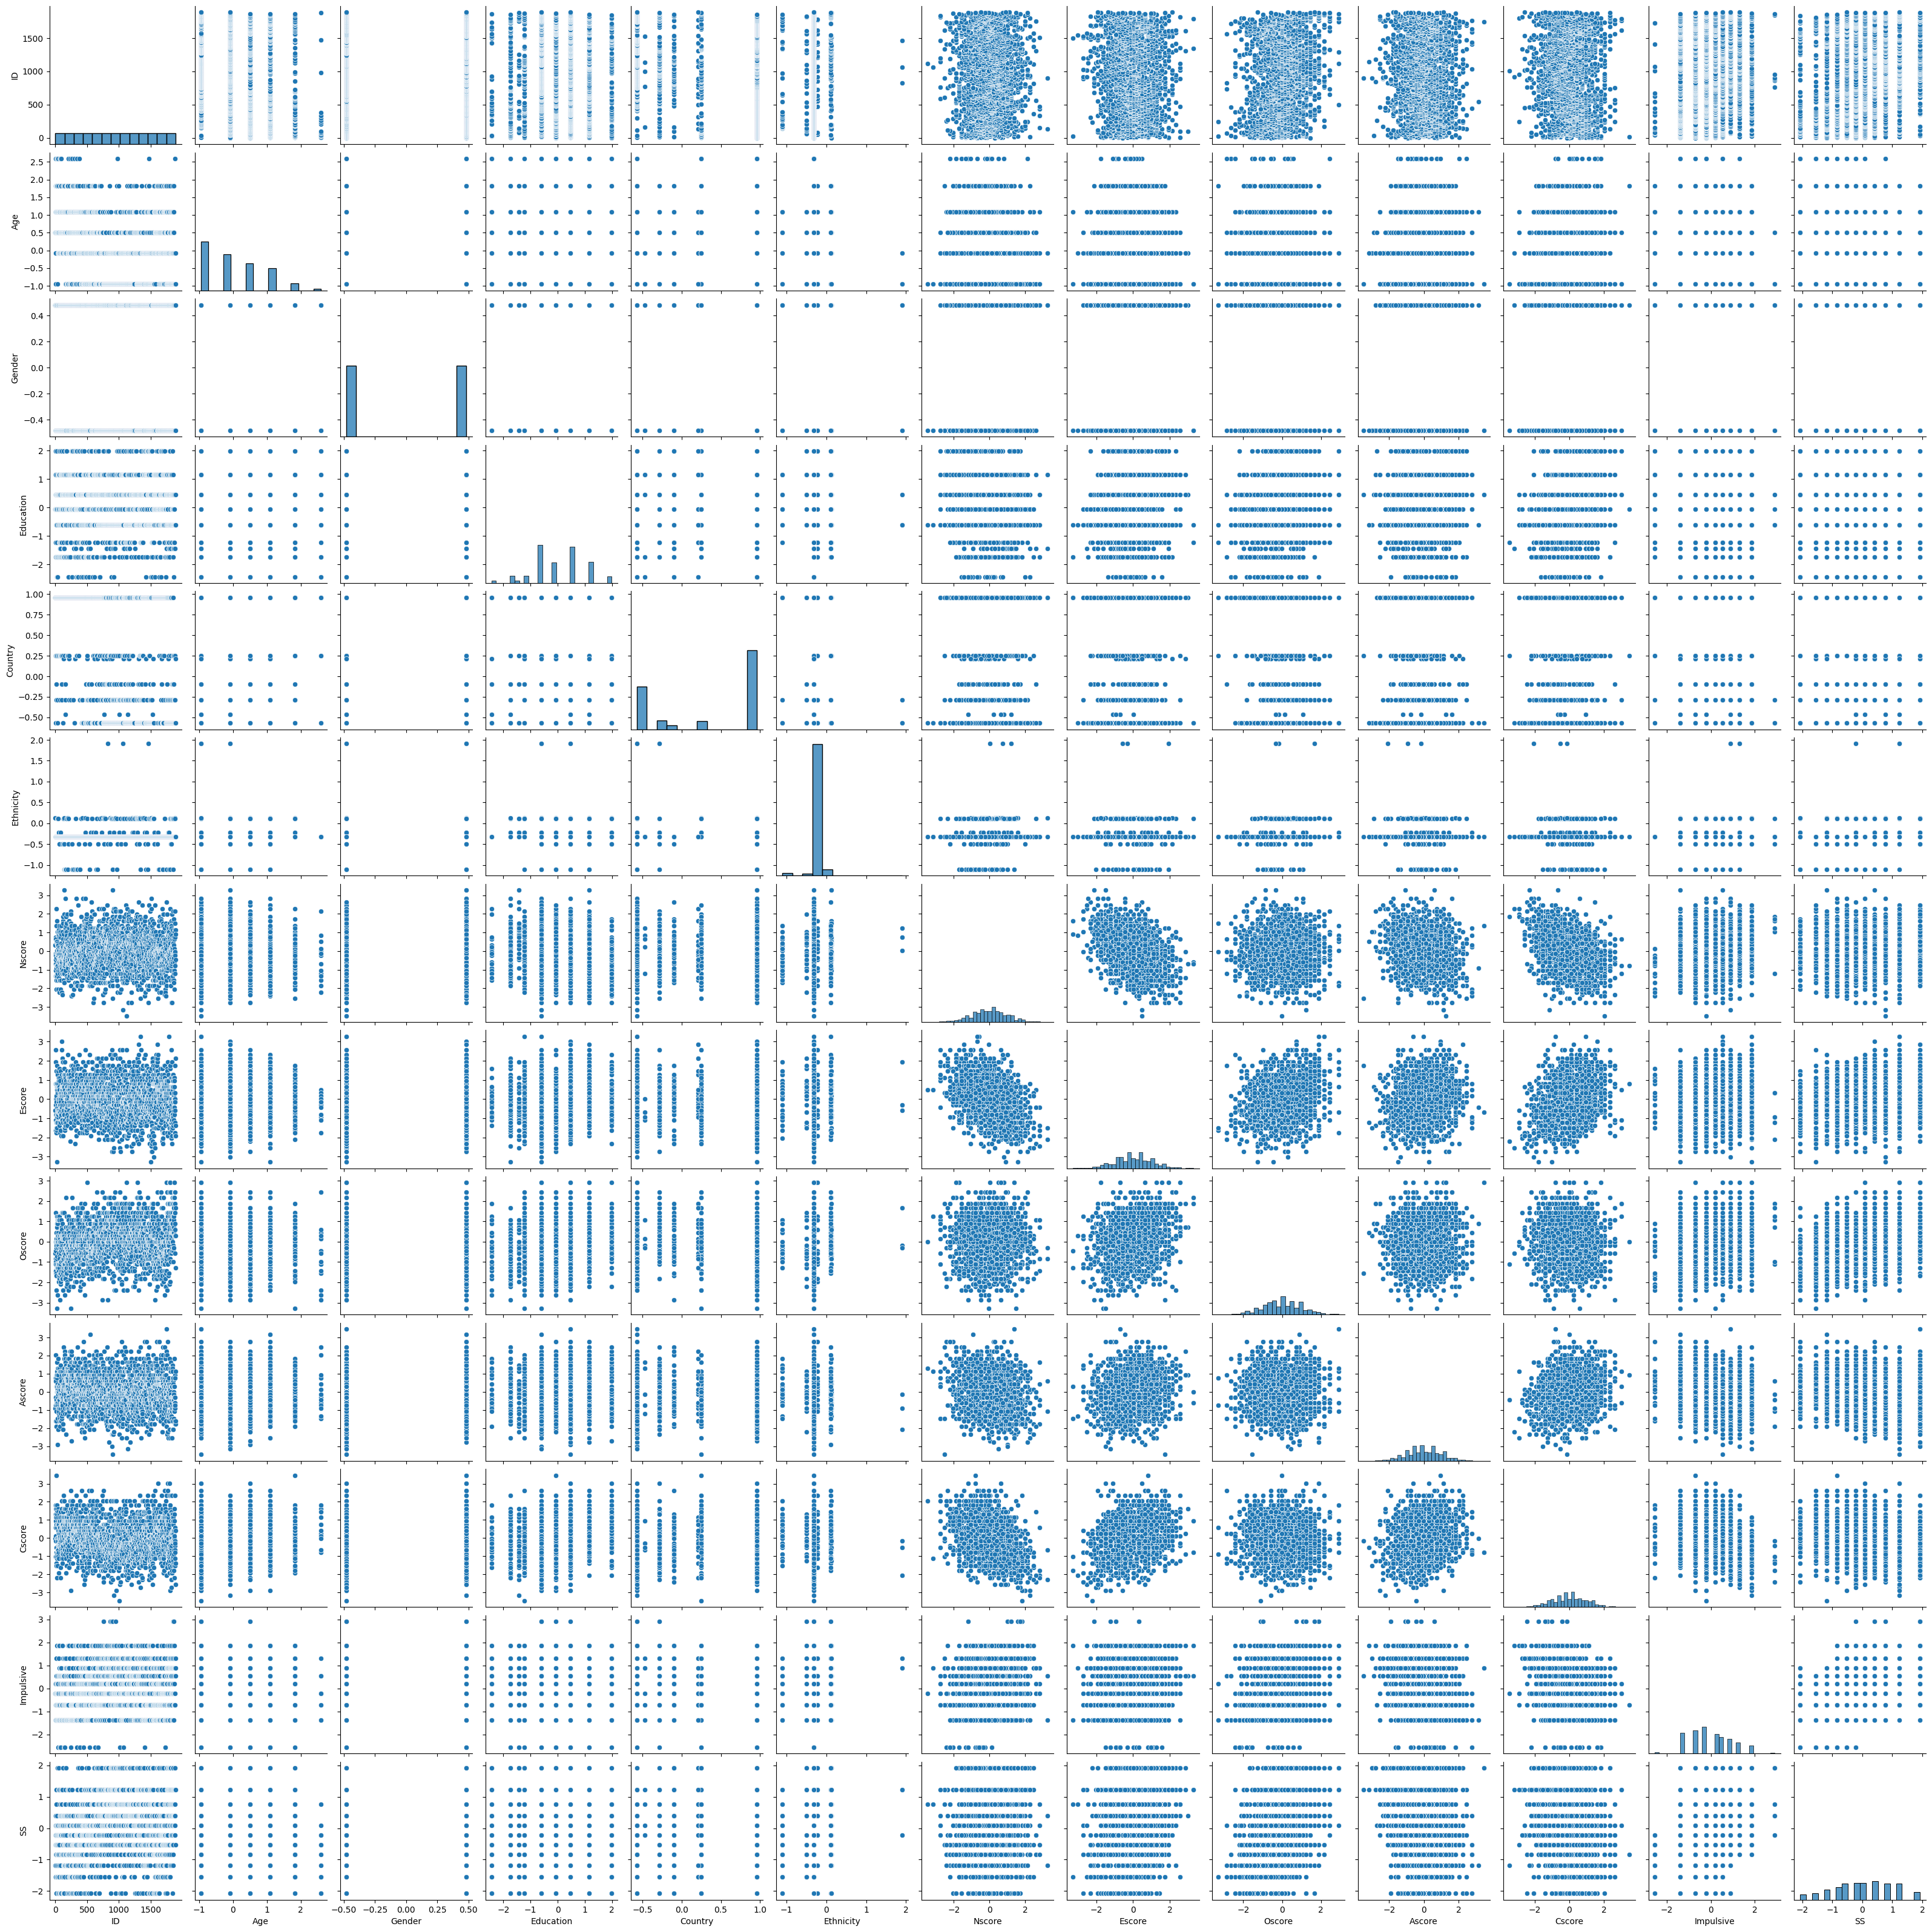

In [12]:
sns.pairplot(data=drug_df)

## 4. Feature Engineering

In [28]:
X = drug_df.drop([
    'ID', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
    'Ecstasy',	'Heroin',	'Ketamine',	'Legalh',	'LSD',	'Meth',	'Mushrooms',	'Nicotine',	'Semer',	'VSA'], axis=1)
y = drug_df['Ecstasy']

In [29]:
X.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'],
      dtype='object')

## 5. Split Dataset

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=42)

In [115]:
X_train.shape, X_test.shape

((1508, 12), (377, 12))

In [116]:
X_train.values

array([[-0.95197,  0.48246, -0.61113, ...,  0.25953,  0.88113,  0.7654 ],
       [-0.07854,  0.48246,  1.16365, ...,  1.13407, -0.21712, -0.52593],
       [-0.95197,  0.48246,  0.45468, ...,  2.04506, -0.71126, -0.52593],
       ...,
       [-0.95197, -0.48246,  0.45468, ..., -0.40581,  1.86203,  1.2247 ],
       [-0.07854, -0.48246,  1.16365, ...,  0.12331, -0.71126,  0.40148],
       [-0.95197, -0.48246, -0.61113, ..., -1.25773,  0.88113,  0.40148]])

## 6. Initialize and train simple model

In [117]:
# Compare with a single KNN model without feature selection
single_model = LogisticRegression(max_iter=1000, solver='newton-cg')
single_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [118]:
single_predictions = single_model.predict(X_test)
single_model_accuracy = accuracy_score(y_test, single_predictions)
print(f'Single LR model accuracy: {single_model_accuracy:.4f}')

Single LR model accuracy: 0.5464


## 7. Manual Bootstraping

In [119]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [120]:
# Number of bootstrap samples to create
n_bootstrap_samples = 100

In [121]:
X_train.shape

(1508, 12)

In [122]:
# Create a list to store predictions from each bootstrap sample
bootstrap_predictions = []

# Generate bootstrap samples and train a model on each
for n in range(n_bootstrap_samples):

    # Sample with replacement from X_train, y_train
    bootstrap_indices = np.random.randint(0, len(X_train), len(X_train) - 100)
    X_bootstrap = X_train.values[bootstrap_indices]
    y_bootstrap = y_train.values[bootstrap_indices]

    # Train a logistic regression model on the bootstrap sample
    model = LogisticRegression(max_iter=1000, solver='newton-cg')
    model.fit(X_bootstrap, y_bootstrap)

    # Store predictions for the test set
    predictions = model.predict(X_test.values)
    bootstrap_predictions.append(predictions)

In [123]:
bootstrap_predictions[0].shape
ensemble_votes = []
for pixel_index in range(bootstrap_predictions[0].shape[0]):
    ensemble_votes.append(statistics.mode([bootstrap_predictions[e][pixel_index] for e in range(len(bootstrap_predictions))]))

In [124]:
# Combine predictions from all bootstrap samples using voting
import statistics
ensemble_accuracy = accuracy_score(y_test, ensemble_votes)
print(f'Ensemble accuracy: {ensemble_accuracy:.4f}')

Ensemble accuracy: 0.5517
